In [217]:
library(dplyr)
library(ggplot2)
library(scales)
library(plyr)
require(mfx)

In [215]:
install.packages("mfx")

also installing the dependencies 'flexmix', 'modeltools', 'betareg'




package 'flexmix' successfully unpacked and MD5 sums checked
package 'modeltools' successfully unpacked and MD5 sums checked
package 'betareg' successfully unpacked and MD5 sums checked
package 'mfx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Eduardo\AppData\Local\Temp\RtmpMpKC9t\downloaded_packages


In [1]:
data = read.table("dataset/enade.txt",sep=";", dec = ",", header = TRUE)
head(data)

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,5
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,5,6,6,6,6,4
5,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,6,6,6,6,6,6,6,6,6
6,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6,5,6,6,6,6,6,6,6,5


In [3]:
df = data[data$CO_GRUPO == 13,]
dim(df)

[1] 9582  137

In [97]:
df_= df %>%
    select(CO_CATEGAD, TP_PRES)%>%
    setNames(c("tipo", "presenca"))


In [98]:
df_$tipo = ifelse(df_$tipo==118|df_$tipo==120|df_$tipo==121|df_$tipo==10005
      |df_$tipo==10006|df_$tipo==10007|df_$tipo==10008|df_$tipo==10009
      |df_$tipo==17634, "privada", "publica")
df_$presenca = ifelse(df_$presenca==222, "ausente", "presente")

In [99]:
df_$tipo = as.factor(df_$tipo)
df_$presenca = as.factor(df_$presenca)
head(df_)

,tipo,presenca
,<fct>,<fct>
161,privada,presente
162,privada,presente
163,privada,presente
164,privada,presente
165,privada,presente
166,privada,presente


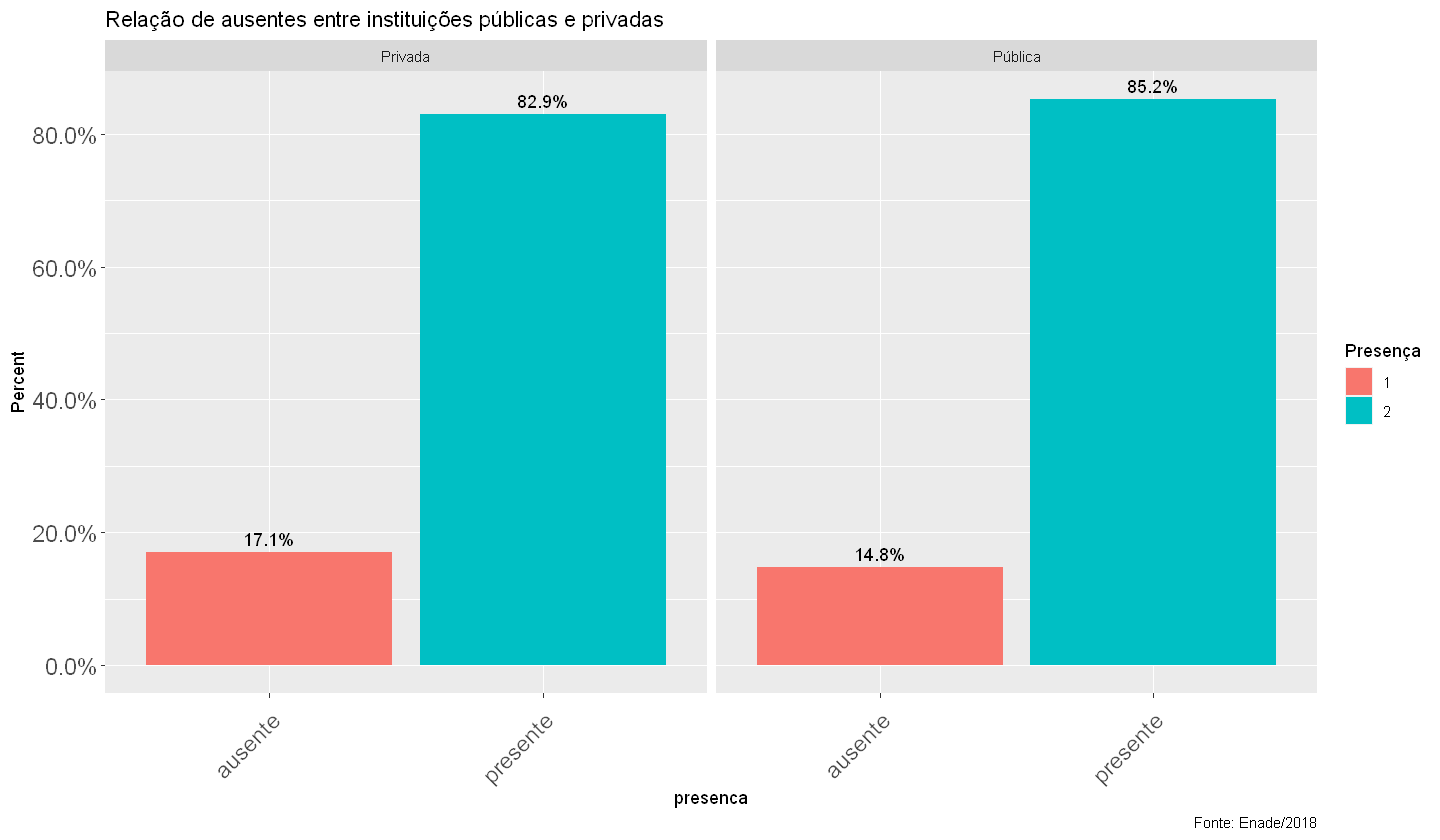

In [100]:
options(repr.plot.width = 12, repr.plot.height = 7)
levels(df_$tipo) = c("Privada", "Pública")
ggplot(df_, aes(x= presenca,  group=tipo)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(title='Relação de ausentes entre instituições públicas e privadas', 
         y = "Percent", fill="Presença",
         caption=('Fonte: Enade/2018')) +
    facet_grid(~tipo) +
    scale_y_continuous(labels = scales::percent)+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
          axis.text = element_text(size = 14));
    

In [158]:
df_boicote = df %>%
    filter(TP_PRES==555)%>%
    select(CO_CATEGAD, TP_PR_GER)%>%
    setNames(c("tipo", "boicote"))


In [159]:
df_boicote$boicote[df_boicote$boicote==333]

[1] 333 333 333 333 333 333 333 333 333 333 333 333 333 333 333 333 333 333 333
[20] 333 333 333

In [147]:
head(df_boicote)

,tipo,boicote
,<int>,<int>
1,10008,555
2,10008,555
3,10008,555
4,10008,555
5,10008,555
6,10008,555


In [160]:
df_boicote$tipo = ifelse(df_boicote$tipo==118|df_boicote$tipo==120|df_boicote$tipo==121
      |df_boicote$tipo==10005|df_boicote$tipo==10006|df_boicote$tipo==10007
      |df_boicote$tipo==10008|df_boicote$tipo==10009|df_boicote$tipo==17634, "privada", "publica")
df_boicote$boicote = ifelse(df_boicote$boicote==333, "boicotou", "realizou")

In [149]:
df_boicote$tipo = as.factor(df_boicote$tipo)
df_boicote$boicote = as.factor(df_boicote$boicote)
df_boicote

tipo,boicote
<fct>,<fct>
privada,realizou
privada,realizou
privada,realizou
privada,realizou
privada,realizou
privada,realizou
privada,realizou
privada,realizou
privada,realizou


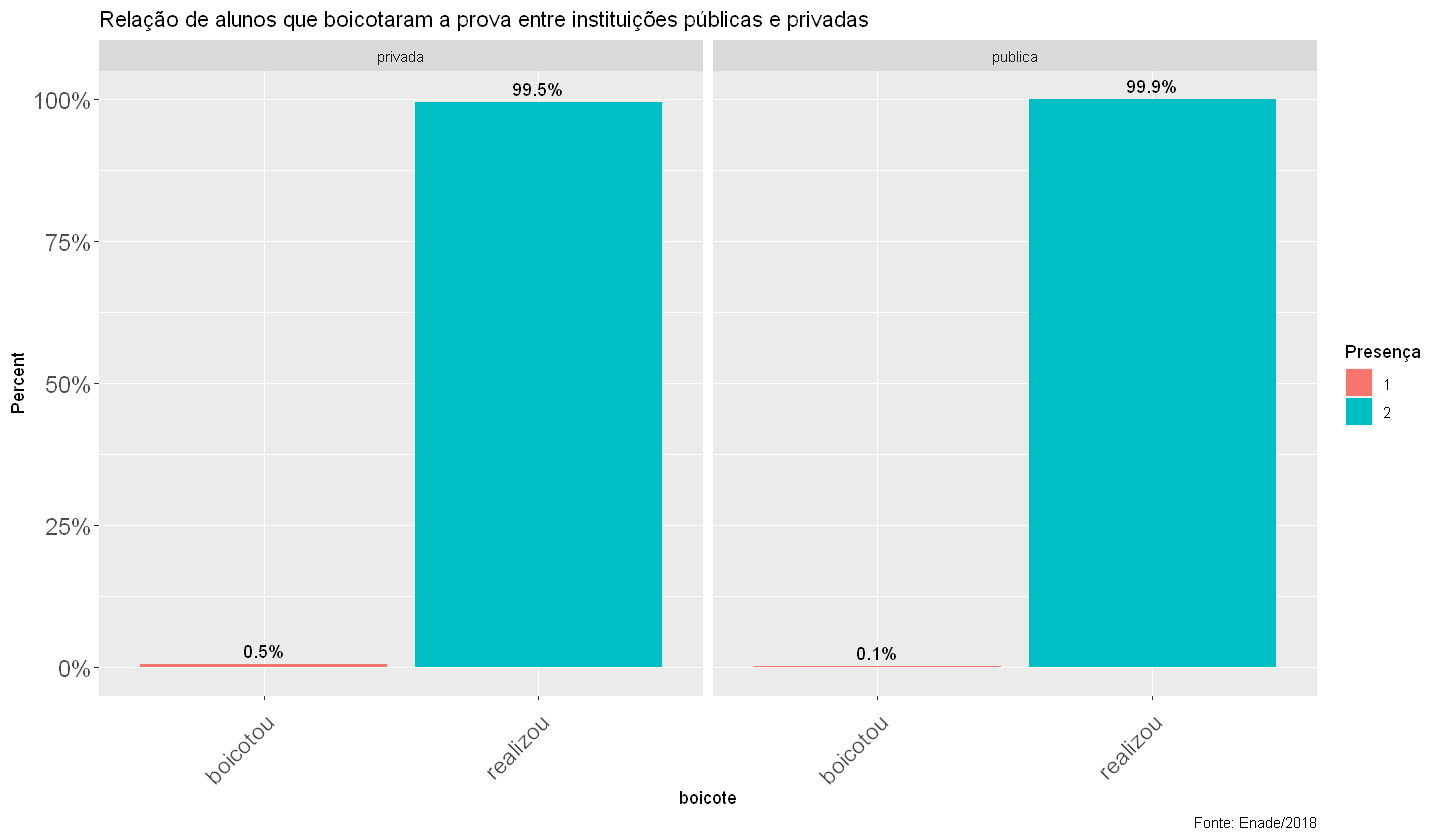

In [163]:
options(repr.plot.width = 12, repr.plot.height = 7)
levels(df_boicote$tipo) = c("Privada", "Pública")
ggplot(df_boicote, aes(x= boicote,  group=tipo)) + 
    geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") +
    geom_text(aes( label = scales::percent(..prop..),
                   y= ..prop.. ), stat= "count", vjust = -.5) +
    labs(title='Relação de alunos que boicotaram a prova entre instituições públicas e privadas', 
         y = "Percent", fill="Presença",
         caption=('Fonte: Enade/2018')) +
    facet_grid(~tipo) +
    scale_y_continuous(labels = scales::percent)+
    theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1),
          axis.text = element_text(size = 14));
    

In [201]:
df_model_1 = df %>%
    filter(TP_PRES==555)%>%
    select(TP_PR_GER, TP_SEXO, NU_IDADE, QE_I02, QE_I01,CO_CATEGAD,CO_TURNO_GRADUACAO)%>%
    setNames(c("boicote", "genero", "idade", "cor", "estado_civil", "instituicao", "turno"))

In [202]:
df_model_1$instituicao = ifelse(df_model_1$instituicao==118|df_model_1$instituicao==120|df_model_1$instituicao==121
      |df_model_1$instituicao==10005|df_model_1$instituicao==10006|df_model_1$instituicao==10007
      |df_model_1$instituicao==10008|df_model_1$instituicao==10009|df_model_1$instituicao==17634, "privada", "publica")
df_model_1$boicote = ifelse(df_model_1$boicote==333, "boicotou", "realizou")

In [203]:
df_model_1$cor = mapvalues(df_model_1$cor, from=c("A","B","C","D","E","F"), to=c("branca","preta","amarela","parda","indigina","não declarado"))
df_model_1$estado_civil = mapvalues(df_model_1$estado_civil, from=c("A","B","C","D","E"), to=c("solteiro","casado","separado","viuvo","outro"))
df_model_1$turno = mapvalues(df_model_1$turno, from=c(1,2,3,4), to=c("matutino","vespertino","integral","noturno"))

In [204]:
df_model_1$instituicao = as.factor(df_model_1$instituicao)
df_model_1$boicote = as.factor(df_model_1$boicote)
df_model_1$turno = as.factor(df_model_1$turno)

In [205]:
df_model_1

boicote,genero,idade,cor,estado_civil,instituicao,turno
<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>
realizou,F,28,branca,solteiro,privada,noturno
realizou,M,30,branca,solteiro,privada,noturno
realizou,M,29,branca,solteiro,privada,noturno
realizou,F,22,branca,casado,privada,noturno
realizou,M,47,branca,casado,privada,noturno
realizou,M,27,branca,solteiro,privada,noturno
realizou,F,23,branca,solteiro,privada,noturno
realizou,F,48,branca,solteiro,privada,noturno
realizou,M,23,branca,solteiro,privada,noturno


In [188]:
levels(df_model_1$boicote)

[1] "boicotou" "realizou"

In [208]:
levels(df_model_1$instituicao)

[1] "privada" "publica"

In [209]:
model = glm(boicote~., data=df_model_1, family=binomial(link='logit'))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [210]:
summary(model)


Call:
glm(formula = boicote ~ ., family = binomial(link = "logit"), 
    data = df_model_1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.9189   0.0286   0.0528   0.0812   0.6053  

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           5.605e+00  1.573e+00   3.562 0.000368 ***
generoM               7.330e-01  4.366e-01   1.679 0.093139 .  
idade                -6.153e-02  2.942e-02  -2.091 0.036524 *  
corbranca             1.552e-01  1.267e+00   0.123 0.902470    
corpreta              8.877e-01  1.588e+00   0.559 0.576045    
coramarela            1.684e+01  3.237e+03   0.005 0.995850    
corparda              1.087e+00  1.352e+00   0.804 0.421166    
corindigina           1.636e+01  1.016e+04   0.002 0.998716    
cornão declarado      1.674e+01  3.369e+03   0.005 0.996035    
estado_civilsolteiro  1.478e+00  7.968e-01   1.855 0.063564 .  
estado_civilcasado    1.918e+00  

In [228]:
exp(cbind(OR = coef(model), confint.default(model)))

,OR,2.5 %,97.5 %
(Intercept),2.718453e+02,12.44469716,5938.2621615
generoM,2.081380e+00,0.88458897,4.8973500
idade,9.403270e-01,0.88763183,0.9961504
corbranca,1.167894e+00,0.09757384,13.9789052
corpreta,2.429520e+00,0.10819928,54.5527470
coramarela,2.048201e+07,0.00000000,Inf
corparda,2.965907e+00,0.20975913,41.9367004
corindigina,1.269114e+07,0.00000000,Inf
cornão declarado,1.870559e+07,0.00000000,Inf
estado_civilsolteiro,4.385612e+00,0.91992835,20.9077031


In [284]:
media = data.frame(genero=c("M"),idade=mean(mean(df_model_1$idade[df_model_1$genero=="M"])), cor="branca", 
                   estado_civil="solteiro",instituicao="publica",turno="noturno")

media
media_ = data.frame(genero=c("M"),idade=mean(mean(df_model_1$idade[df_model_1$genero=="M"]+20)), cor="branca", 
                   estado_civil="solteiro",instituicao="publica",turno="noturno")

media_
media_3 = data.frame(genero=c("M"),idade=mean(mean(df_model_1$idade[df_model_1$genero=="M"]+20)), cor="branca", 
                   estado_civil="solteiro",instituicao="privada",turno="noturno")

media_3

genero,idade,cor,estado_civil,instituicao,turno
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
M,26.66953,branca,solteiro,publica,noturno


genero,idade,cor,estado_civil,instituicao,turno
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
M,46.66953,branca,solteiro,publica,noturno


genero,idade,cor,estado_civil,instituicao,turno
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
M,46.66953,branca,solteiro,privada,noturno


In [285]:
media$pred.prob = predict(model, newdata=media, type="response")
media

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


genero,idade,cor,estado_civil,instituicao,turno,pred.prob
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
M,26.66953,branca,solteiro,publica,noturno,0.9982445


In [286]:
media_$pred.prob = predict(model, newdata=media_, type="response")
media_

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


genero,idade,cor,estado_civil,instituicao,turno,pred.prob
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
M,46.66953,branca,solteiro,publica,noturno,0.9940163


In [287]:
media_3$pred.prob = predict(model, newdata=media_3, type="response")
media_3

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


genero,idade,cor,estado_civil,instituicao,turno,pred.prob
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>
M,46.66953,branca,solteiro,privada,noturno,0.9818547
